In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


Opening the dataset first before the notebook, only loads it on and does not tell the notebook to read it

# **To creat a comprehensive workflow of the sales data which has been obtained from Kaggle**

* Data import
* Data cleanng and Transformation
* Explorartory Data Analysis (EDA)
* Data Visualisation

# **1. Data import (Pandas)**

**Importing Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# import the dataset

path = '/kaggle/input/sample-sales-data/sales_data_sample.csv'
sales_data = pd.read_csv(path, encoding ='latin')
sales_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


## 2. Initial Inspection of Data ##
This is a very basic inspection of the data and is not cleaning the data

In [7]:
# find the names of the columns

sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [8]:
# Finding information on the dataset

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


print statement is required when using the Python app

**(print(sales_data.info())**

In [9]:
# Display the summary statistics of the numerical columns

sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [16]:
sales_data['ORDERNUMBER'].nunique()

307

# **Handling and checking missing values**

In [17]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [18]:
sales_data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [20]:
sales_data.TERRITORY.unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

* nan = territory has not been defined
* Japan should be in APAC

In [21]:
sales_data.COUNTRY.unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [24]:
sales_data.loc[sales_data['COUNTRY']=='USA']

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,10185,28,64.43,6,1804.04,11/14/2003 0:00,Shipped,4,11,2003,...,4575 Hillside Dr.,NaN,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Small
2807,10222,36,63.34,18,2280.24,2/19/2004 0:00,Shipped,1,2,2004,...,361 Furth Circle,NaN,San Diego,CA,91217,USA,NaN,Thompson,Valarie,Small
2809,10248,23,65.52,9,1506.96,5/7/2004 0:00,Cancelled,2,5,2004,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
2817,10337,42,97.16,5,4080.72,11/21/2004 0:00,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,NaN,Hernandez,Maria,Medium


# **Filling the NaN vale to make the dataset complete**

In [25]:
sales_data['TERRITORY'].fillna('Americas')

0       Americas
1           EMEA
2           EMEA
3       Americas
4       Americas
          ...   
2818        EMEA
2819        EMEA
2820        EMEA
2821        EMEA
2822    Americas
Name: TERRITORY, Length: 2823, dtype: object

In [28]:
# To bring territory down to 0

sales_data['TERRITORY']=sales_data['TERRITORY'].fillna('Americas')

In [29]:
sales_data.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [32]:
#find all instances where territory is null and assign to variable
 
null_t = sales_data.loc[sales_data['TERRITORY'].isnull()]
 
#find impacted countries from null list
 
null_t.COUNTRY.unique()

array([], dtype=object)

# **Replacing Japan in territory to APAC**

In [30]:
sales_data['TERRITORY']=sales_data['TERRITORY'].replace('Japan','APAC')

In [31]:
sales_data['TERRITORY'].unique()

array(['Americas', 'EMEA', 'APAC'], dtype=object)

# **Descriptive Statistics:** Summary statistics for numberical columns

In [15]:
# Display the summary statistics of the categorical columns
# O must be in capital and is not a number (zero), O means non-number (object)

sales_data.describe(include=['O'])

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823,2823,2823,2823,2823,2823,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,252,6,7,109,92,91,92,9,73,16,73,19,3,77,72,3
top,11/14/2003 0:00,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,38,2617,967,52,259,259,259,55,304,416,259,1004,1407,259,259,1384


# **3. Exloratory Data Analysis (EDA)**

Perform EDA to understand the dataset better:


* **Distribution Analysis:** Histograms, box plots
* **Correlation Analysis:** Heatmap of correlation 

In [33]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

<Axes: >

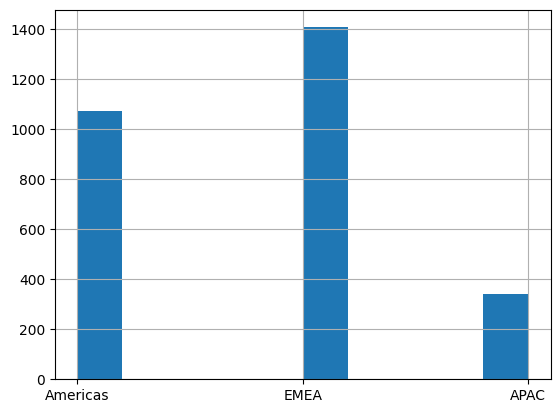

In [34]:
# distribution analysis
# Histogram

sales_data.TERRITORY.hist()

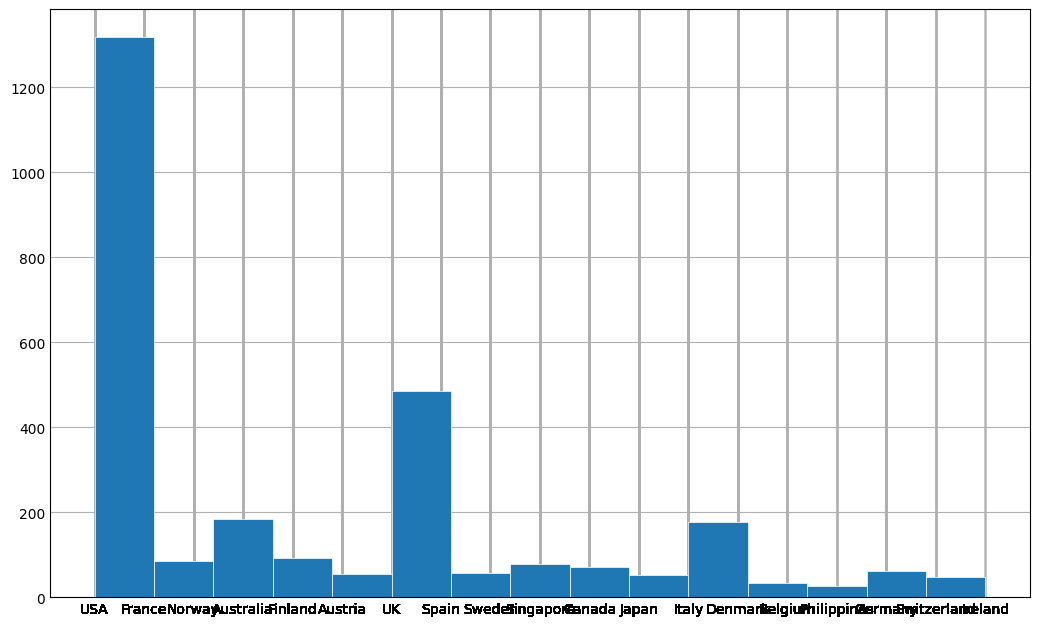

In [38]:
plt.style.use('_mpl-gallery')
 
# plot:
#plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(10,6))
 
ax.hist(sales_data['COUNTRY'], bins=15, linewidth=0.5, edgecolor="white") 
ax.set(xticks=sales_data['COUNTRY'])
 
plt.show()


/tmp/ipykernel_33/3401671952.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=sales_data, x='COUNTRY', stat='count', discrete=True,kde=False, ax=ax, palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


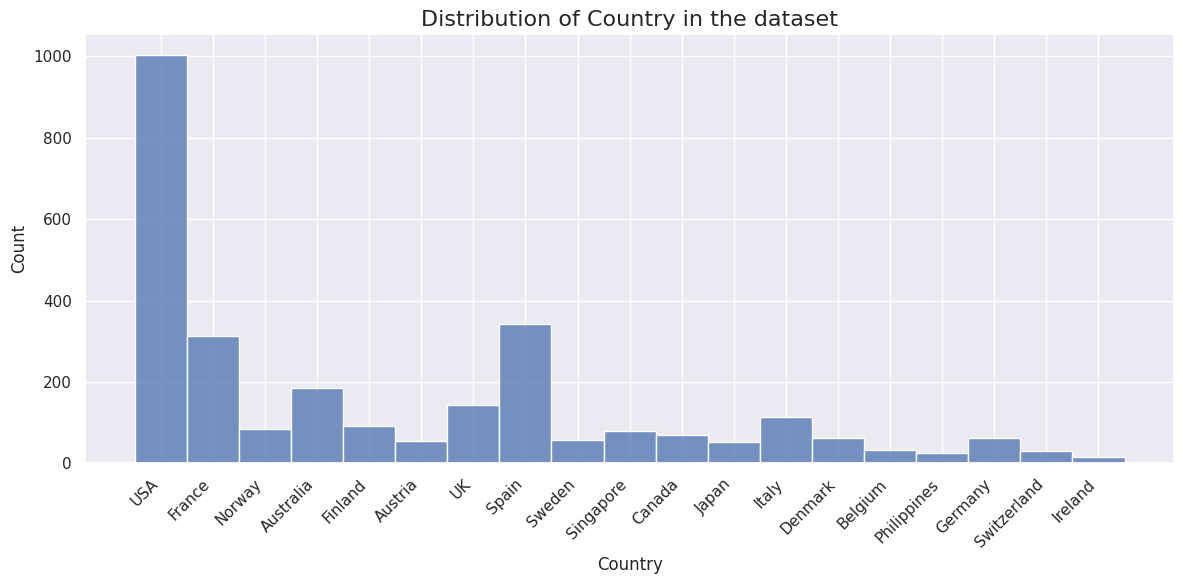

In [40]:
# Set the style 
sns.set_theme(style="darkgrid")
 
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))
 
#create the histogram
sns.histplot(data=sales_data, x='COUNTRY', stat='count', discrete=True,kde=False, ax=ax, palette='viridis')
 
# Customize the plot
ax.set_title('Distribution of Country in the dataset', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
 
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
 
# Adjust layout to prevent cutting off labels
plt.tight_layout()
 
# Show the plot
plt.show()

In [44]:
sorted_sales=sales_data.sort_values(by='SALES', ascending=True)
sorted_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2249,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
1287,10407,6,90.19,3,541.14,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,Americas,Frick,Sue,Small
2044,10408,15,36.93,1,553.95,4/22/2005 0:00,Shipped,2,4,2005,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,APAC,Shimamura,Akiko,Small
1551,10280,20,28.88,12,577.60,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo,Small
1818,10419,15,42.67,7,640.05,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,10403,66,100.00,9,11886.60,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
1062,10412,60,100.00,9,11887.80,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
53,10424,50,100.00,6,12001.00,5/31/2005 0:00,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
744,10322,50,100.00,6,12536.50,11/4/2004 0:00,Shipped,4,11,2004,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,Americas,Young,Valarie,Large


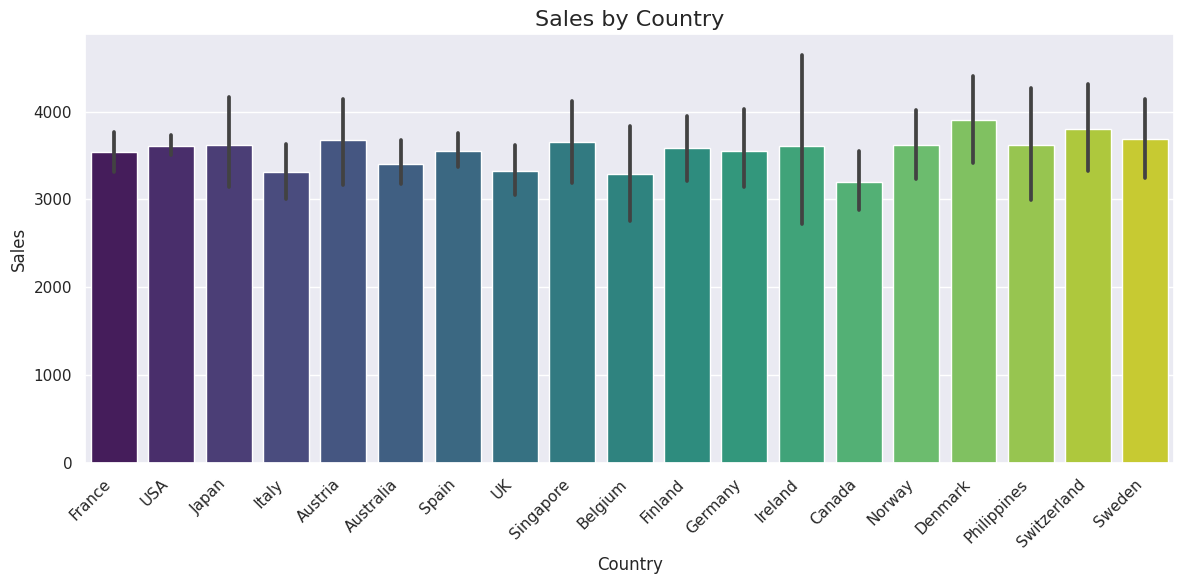

In [43]:
# Set the style 
sns.set_theme(style="darkgrid")
 
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))
 
#create the histogram
sns.barplot(data=sorted_sales, x='COUNTRY', y='SALES', ax=ax, palette='viridis')
 
# Customize the plot
ax.set_title('Sales by Country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
 
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
 
# Adjust layout to prevent cutting off labels
plt.tight_layout()
 
# Show the plot
plt.show()

# **Questions**

- What are the total sales over the past year?
- Which product has the highest sales?
- What is the average order value?
- How many unique customers made purchases?
- What is the sales trend over the past year?
- What are the peak sales months?
- Which region generates the most sales?
- What is the average sales per region?
- How do sales vary by product category?
- What is the customer retention rate?
- Which customer has made the most purchases?
- What is the average quantity ordered per product?
- How do sales compare between new and returning customers?
- What is the average order frequency per customer?
- Which sales channel is the most effective?
- What is the distribution of sales by payment method?
- How do sales vary by day of the week?
- What is the average delivery time?
- Which products have the highest return rates?
- What is the correlation between sales and discounts?
- How do sales vary by customer demographic?
- What is the lifetime value of a customer?
- Which marketing campaigns are the most effective?
- What is the conversion rate from leads to sales?
- How do sales vary by season?
- What is the average customer acquisition cost?
- Which products are frequently bought together?
- What is the impact of promotions on sales?
- How do sales vary by customer location?
- What is the average sales per sales representative?
- How do sales vary by product price range?
- What is the average sales per order?
- Which products have the highest profit margins?
- What is the average sales growth rate?
- How do sales vary by customer segment?
- What is the average time between repeat purchases?
- Which products have the highest stock turnover rate?
- What is the impact of customer reviews on sales?
- How do sales vary by product launch date?
- What is the average sales per marketing channel?
- Which products have the highest customer satisfaction?
- What is the impact of shipping costs on sales?
- How do sales vary by order size?
- What is the average sales per product category?
- Which regions have the highest customer loyalty?
- What is the impact of economic factors on sales?
- How do sales vary by customer age group?
- What is the average sales per website visit?
- Which products have the highest repeat purchase rate?
- What is the impact of product availability on sales?



In [45]:
# Total sales over the past year?

sales_data.YEAR_ID.unique()

array([2003, 2004, 2005])

In [49]:
sales_2005=sales_data.loc[sales_data['YEAR_ID']==2005]
sales_2005

total_sales = sales_2005['SALES'].sum()
total_sales

1791486.71

In [50]:
# which product has the highest sales?

sales_data.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [58]:
product_sales = pd.DataFrame(sales_data.groupby('PRODUCTLINE')['SALES'].sum()).reset_index()
product_sales_sorted = product_sales.sort_values(by='SALES')


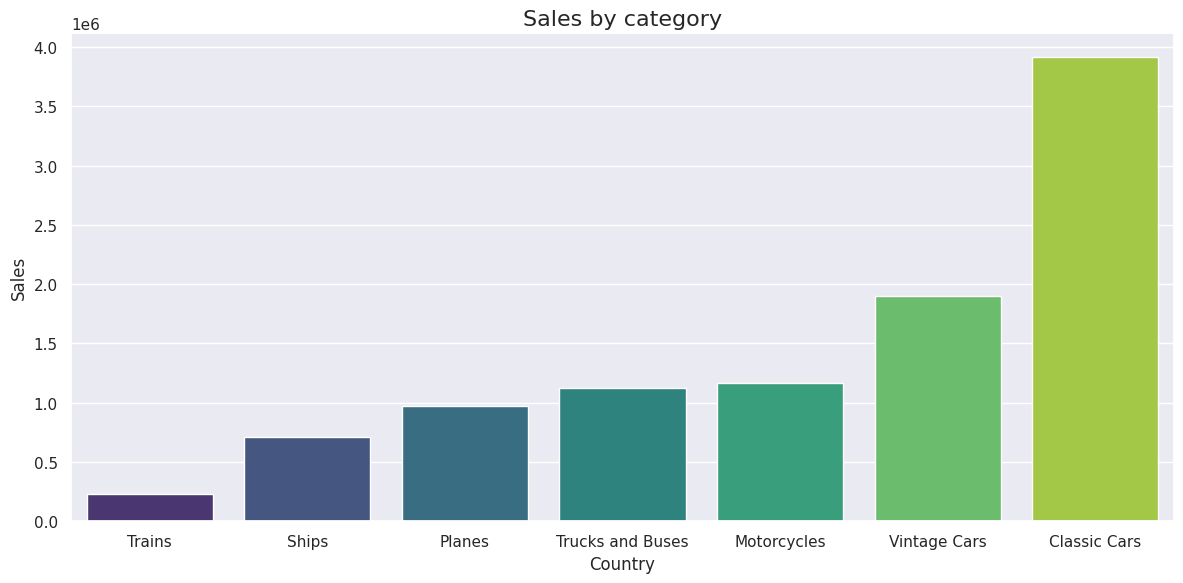

In [59]:
# Set the style 
sns.set_theme(style="darkgrid")
 
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))
 
#create the histogram
sns.barplot(data=product_sales_sorted, x='PRODUCTLINE', y='SALES', ax=ax, palette='viridis')
 
# Customize the plot
ax.set_title('Sales by category', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
 
# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
 
# Adjust layout to prevent cutting off labels
plt.tight_layout()
 
# Show the plot
plt.show()

In [61]:
# Average order number

avg_sales=sales_data["SALES"].mean()
avg_sales

3553.889071909316

In [62]:
order_ID_sales = pd.DataFrame(sales_data.groupby('ORDERNUMBER')['SALES'].mean()).reset_index()
order_ID_sales

,ORDERNUMBER,SALES
0,10100,3033.312500
1,10101,2858.085000
2,10102,3432.025000
3,10103,3418.875000
4,10104,3432.458462
...,...,...
302,10421,3630.875000
303,10422,3083.400000
304,10423,1682.390000
305,10424,5855.556667


/tmp/ipykernel_33/1137707410.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=order_ID_sales.head(20), x='ORDERNUMBER', y='SALES', ax=ax, palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


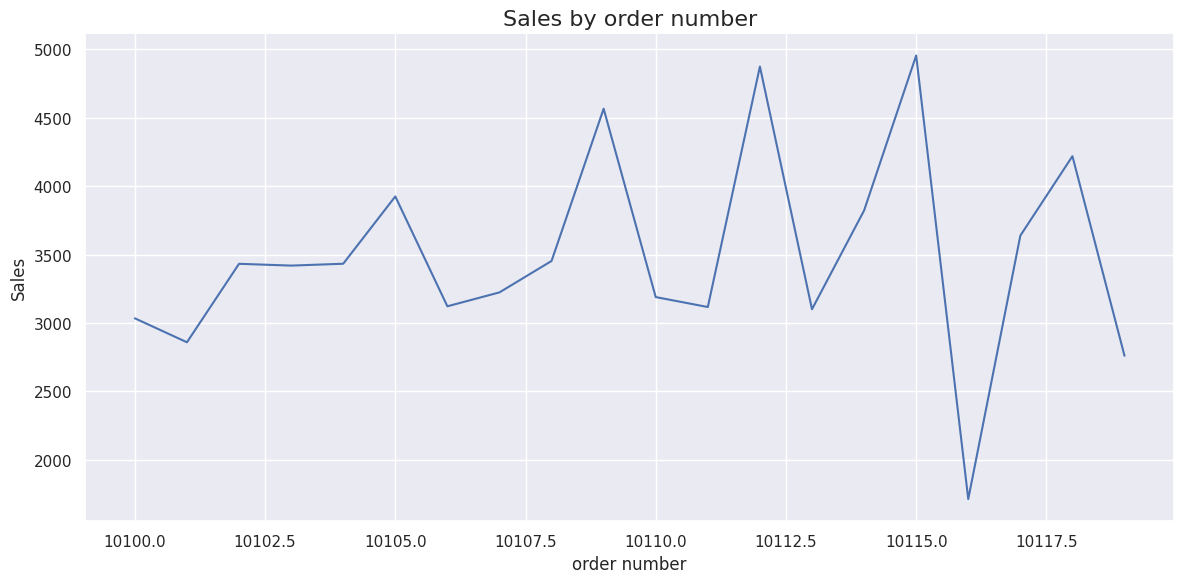

In [63]:
# Set the style 
sns.set_theme(style="darkgrid")
 
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))
 
#create the histogram
sns.lineplot(data=order_ID_sales.head(20), x='ORDERNUMBER', y='SALES', ax=ax, palette='viridis')
 
# Customize the plot
ax.set_title('Sales by order number', fontsize=16)
ax.set_xlabel('order number', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
 
# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
 
# Adjust layout to prevent cutting off labels
plt.tight_layout()
 
# Show the plot
plt.show()

In [64]:
# Count of unique customers

sales_data['CUSTOMERNAME'].nunique()

92

In [73]:
# Peak sales months

sales_2004=sales_data.loc[sales_data['YEAR_ID']==2004]
sales_2003=sales_data.loc[sales_data['YEAR_ID']==2003]


In [71]:
monthly_sales_2004 = pd.DataFrame(sales_2004.groupby('MONTH_ID')['SALES'].sum())
monthly_sales_2004

,SALES
MONTH_ID,
1,316577.42
2,311419.53
3,205733.73
4,206148.12
5,273438.39
6,286674.22
7,327144.09
8,461501.27
9,320750.91


In [69]:
monthly_sales_2005 = pd.DataFrame(sales_2005.groupby('MONTH_ID')['SALES'].sum()).reset_index()
monthly_sales_2005

,MONTH_ID,SALES
0,1,339543.42
1,2,358186.18
2,3,374262.76
3,4,261633.29
4,5,457861.06


In [74]:
region_sales_2005 = pd.DataFrame(sales_2005.groupby('TERRITORY')['SALES'].sum()).reset_index()
region_sales_2005.sort_values(by='SALES')

,TERRITORY,SALES
0,APAC,190600.49
1,Americas,671057.23
2,EMEA,929828.99


YEAR_ID,2003,2004,2005
TERRITORY,,,
APAC,496907.63,513786.93,190600.49
Americas,1359757.38,1821246.78,671057.23
EMEA,1660314.53,2389128.89,929828.99


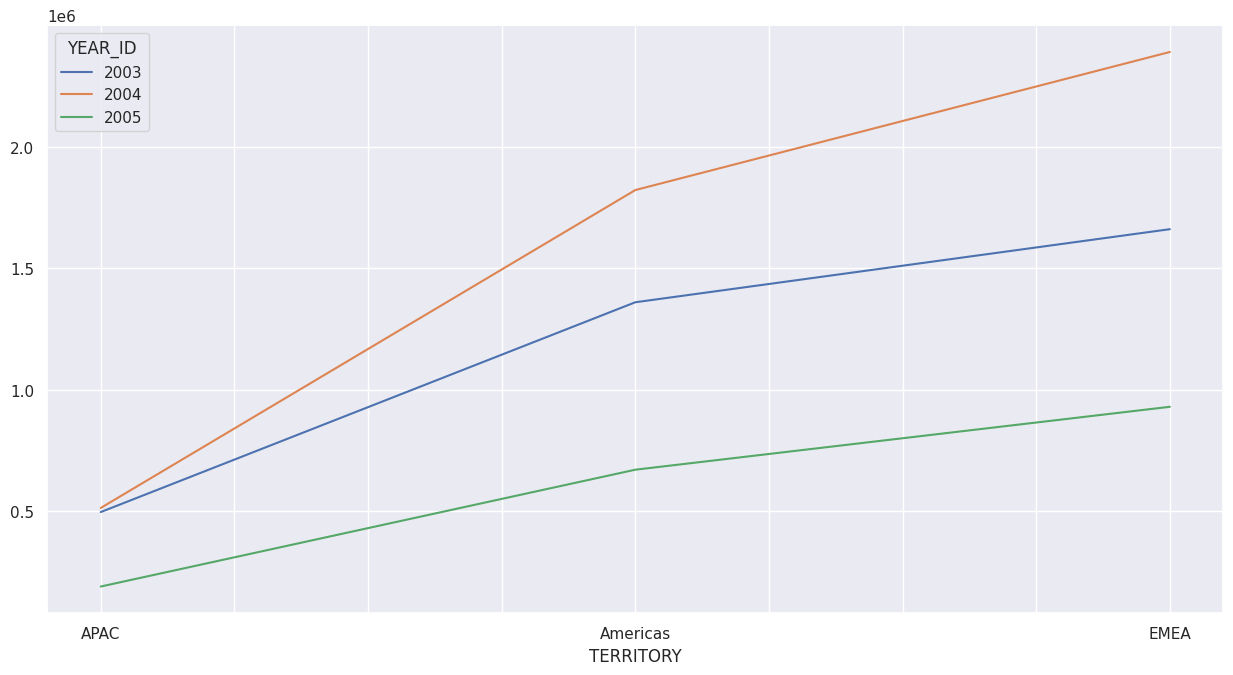

In [76]:
pivot_yearly_sales.plot(figsize=(12,6))
pivot_yearly_sales = sales_data.pivot_table(

                    values='SALES',

                    index='TERRITORY',

                    columns = 'YEAR_ID',

                    aggfunc='sum')

pivot_yearly_sales

ValueError: Could not interpret input 'TERRITORY'

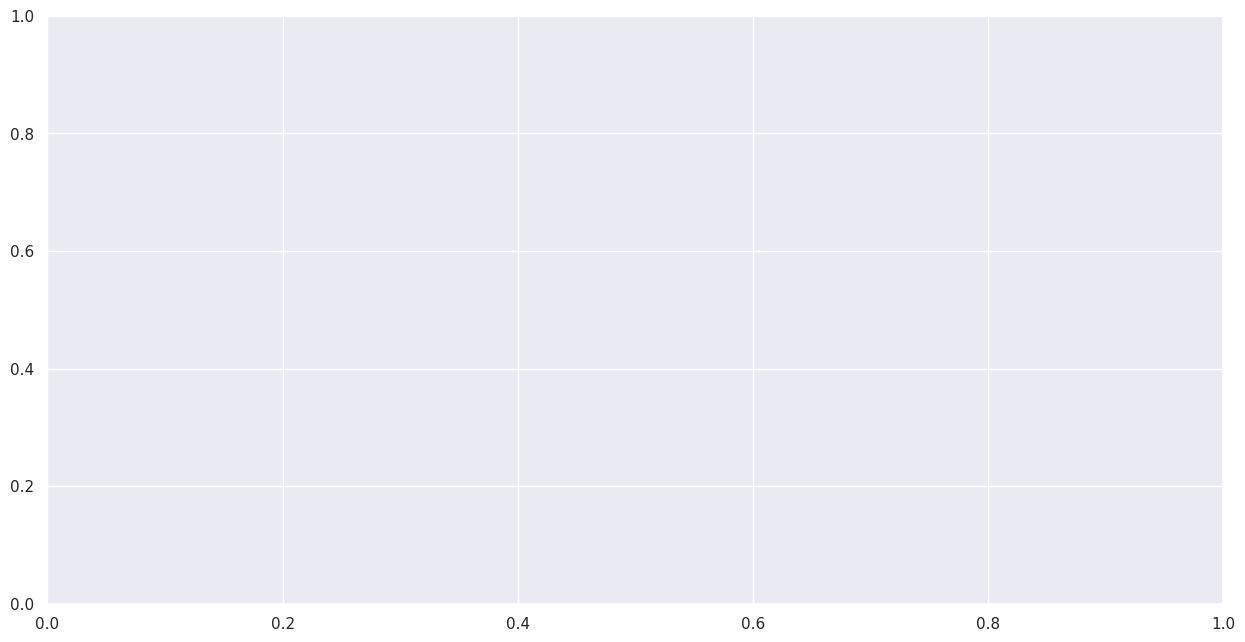

In [78]:
# Set the style 
sns.set_theme(style="darkgrid")
 
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))
 
#create the histogram
sns.barplot(data=pivot_yearly_sales_1, x='TERRITORY', y='SALES', ax=ax, palette='viridis')
 
# Customize the plot
ax.set_title('Sales by month id in 2004', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
 
# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
 
# Adjust layout to prevent cutting off labels
plt.tight_layout()
 
# Show the plot
plt.show()